In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.tree import plot_tree
from sklearn.ensemble import BaggingClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

#Load dataset 
train_data = pd.read_csv('/Users/kritikansal/Desktop/SUBJECTS/CIS 508/FraudDetection/Fraud_train.csv')
test_data = pd.read_csv('/Users/kritikansal/Desktop/SUBJECTS/CIS 508/FraudDetection/Fraud_test.csv')

In [2]:
train_data.shape, test_data.shape

((2999, 32), (12918, 32))

In [3]:
#Finding unique values for each column 

column_names = train_data.columns

for column_name in column_names:
    unique_values = train_data[column_name].unique()
    print(f'{column_name}: {unique_values}')

MONTH: ['Jul' 'Nov' 'Jan' 'Dec' 'Aug' 'Feb' 'Mar' 'Apr' 'May' 'Jun' 'Sep' 'Oct']
WEEKOFMONTH: [3 5 1 2 4]
DAYOFWEEK: ['Sunday' 'Monday' 'Wednesday' 'Friday' 'Tuesday' 'Thursday' 'Saturday']
MAKE: ['Honda' 'Mazda' 'Pontiac' 'Toyota' 'Chevrolet' 'VW' 'Saab' 'Accura'
 'Ford' 'Saturn' 'Mercury' 'BMW' 'Dodge' 'Nisson' 'Porche' 'Mecedes']
ACCIDENTAREA: ['Rural' 'Urban']
DAYOFWEEKCLAIMED: ['Wednesday' 'Tuesday' 'Monday' 'Friday' 'Thursday' 'Saturday' 'Sunday']
MONTHCLAIMED: ['Jan' 'Dec' 'May' 'Feb' 'Aug' 'Mar' 'Apr' 'Jun' 'Jul' 'Oct' 'Sep' 'Nov']
WEEKOFMONTHCLAIMED: [4 1 3 2 5]
SEX: ['Male' 'Female']
MARITALSTATUS: ['Married' 'Single' 'Divorced' 'Widow']
AGE: [21 68 50 39 43  0 41 33 37 29 28 53 31 35 65 57 46 27 22 40 18 76 30 52
 54 51 45 38 44 55 42 64 32 48 34 25 36 63 49 66 67 61 20 26 62 58 19 24
 72 60 47 16 77 59 23 56 80 79 70 75 71 74 78 17 69 73]
FAULT: ['Policy_Holder' 'Third_Party']
POLICYTYPE: ['Sport-Collision' 'Sedan-All_Perils' 'Sedan-Collision'
 'Utility-All_Perils' 'Sedan-L

In [4]:
#Explore data
train_data.tail() #Display last few rows of data

,MONTH,WEEKOFMONTH,DAYOFWEEK,MAKE,ACCIDENTAREA,DAYOFWEEKCLAIMED,MONTHCLAIMED,WEEKOFMONTHCLAIMED,SEX,MARITALSTATUS,AGE,FAULT,POLICYTYPE,VEHICLECATEGORY,VEHICLEPRICE,REPNUMBER,DEDUCTIBLE,DRIVERRATING,DAYS_POLICY_ACCIDENT,DAYS_POLICY_CLAIM,PASTNUMBEROFCLAIMS,AGEOFVEHICLE,AGEOFPOLICYHOLDER,POLICEREPORTFILED,WITNESSPRESENT,AGENTTYPE,NUMBEROFSUPPLIMENTS,ADDRESSCHANGE_CLAIM,NUMBEROFCARS,YEAR,BASEPOLICY,FRAUDFOUND
2994,Apr,2,Monday,Pontiac,Rural,Monday,Apr,2,Male,Married,45,Third_Party,Sedan-Liability,Sport,20000_to_29000,1,400,3,more_than_30,more_than_30,1,7_years,36_to_40,No,No,External,none,no_change,1-vehicle,1996,Liability,No
2995,Nov,4,Thursday,Honda,Urban,Friday,Nov,4,Male,Married,35,Policy_Holder,Sedan-Liability,Sport,30000_to_39000,9,400,4,more_than_30,more_than_30,more_than_4,6_years,31_to_35,No,No,External,none,no_change,1-vehicle,1996,Liability,No
2996,Dec,4,Sunday,Chevrolet,Urban,Wednesday,Jan,1,Male,Married,69,Third_Party,Sedan-Liability,Sport,20000_to_29000,7,400,1,more_than_30,more_than_30,2_to_4,7_years,over_65,No,No,External,none,no_change,1-vehicle,1996,Liability,No
2997,Apr,1,Monday,Toyota,Urban,Tuesday,Apr,1,Male,Married,33,Policy_Holder,Sedan-All_Perils,Sedan,20000_to_29000,10,400,1,more_than_30,more_than_30,2_to_4,6_years,31_to_35,No,No,External,none,no_change,1-vehicle,1996,All_Perils,No
2998,Jun,4,Friday,Pontiac,Urban,Wednesday,Jul,1,Male,Single,30,Policy_Holder,Sedan-All_Perils,Sedan,20000_to_29000,8,400,2,more_than_30,more_than_30,none,7_years,31_to_35,No,No,External,3_to_5,no_change,1-vehicle,1996,All_Perils,No


In [5]:
train_data.shape, test_data.shape

((2999, 32), (12918, 32))

In [6]:
train_data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   MONTH                 2999 non-null   object
 1   WEEKOFMONTH           2999 non-null   int64 
 2   DAYOFWEEK             2999 non-null   object
 3   MAKE                  2999 non-null   object
 4   ACCIDENTAREA          2999 non-null   object
 5   DAYOFWEEKCLAIMED      2999 non-null   object
 6   MONTHCLAIMED          2999 non-null   object
 7   WEEKOFMONTHCLAIMED    2999 non-null   int64 
 8   SEX                   2999 non-null   object
 9   MARITALSTATUS         2999 non-null   object
 10  AGE                   2999 non-null   int64 
 11  FAULT                 2999 non-null   object
 12  POLICYTYPE            2999 non-null   object
 13  VEHICLECATEGORY       2999 non-null   object
 14  VEHICLEPRICE          2999 non-null   object
 15  REPNUMBER             2999 non-null   

In [7]:
#Preprocessing data
#Finding missing values
missing_values = train_data.isna().sum()
missing_values[missing_values > 0] #no missing values for the dataset

Series([], dtype: int64)

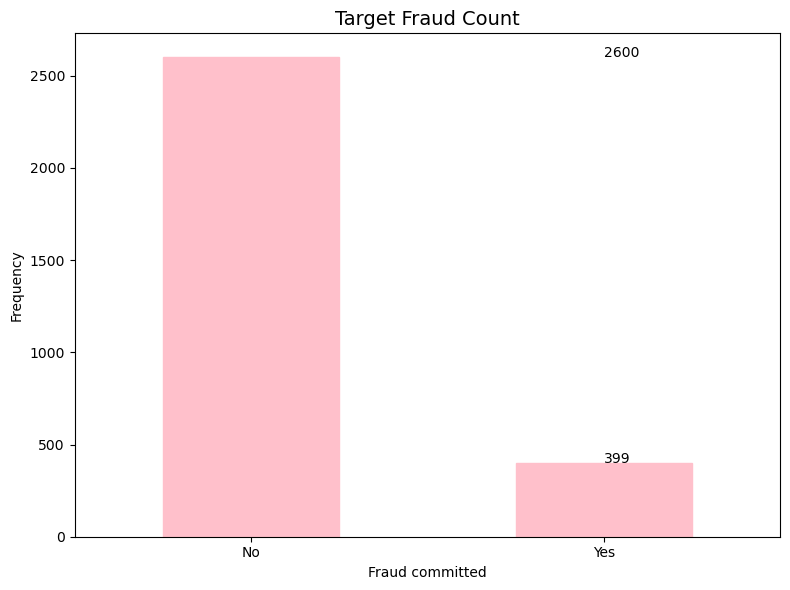

In [8]:
#Plotting bar chart of the 'target variable'
plt.figure(figsize = (8,6))
v_count = train_data['FRAUDFOUND'].value_counts().sort_index()
bar = v_count.plot(kind = 'bar', color = 'pink', edgecolor = 'pink')

for i, count in enumerate(v_count):
    bar.text(x = 1, y = count, s = str(count))
    
plt.title('Target Fraud Count', fontsize = 14, ha = 'center')
plt.xlabel('Fraud committed', fontsize = 10)
plt.ylabel('Frequency', fontsize = 10)
plt.xticks(rotation=0, ha='center')
plt.tight_layout()
plt.show()

#This shows that the dataset is imbalanced and count for unsatisified customer is much lower than satisfied customer

In [9]:
#There are 66 rows where the feature Age is assigned a zero in train data
#There are 252 rows where the feature Age is assigned a zero in test data
print(len(train_data[train_data['AGE']==0]))
print(len(test_data[test_data['AGE']==0]))

66
252


In [10]:
#though for the displayed rows the policy holder is said to be between 16 and 17 years old. 
train_data.loc[train_data['AGE']==0, 'AGEOFPOLICYHOLDER']

5       16_to_17
9       16_to_17
39      16_to_17
44      16_to_17
46      16_to_17
63      16_to_17
72      16_to_17
73      16_to_17
89      16_to_17
95      16_to_17
221     16_to_17
398     16_to_17
428     16_to_17
596     16_to_17
619     16_to_17
697     16_to_17
699     16_to_17
708     16_to_17
738     16_to_17
805     16_to_17
883     16_to_17
901     16_to_17
938     16_to_17
982     16_to_17
1011    16_to_17
1218    16_to_17
1243    16_to_17
1265    16_to_17
1300    16_to_17
1378    16_to_17
1386    16_to_17
1417    16_to_17
1605    16_to_17
1654    16_to_17
1757    16_to_17
1819    16_to_17
1825    16_to_17
1854    16_to_17
1864    16_to_17
1894    16_to_17
1982    16_to_17
2024    16_to_17
2076    16_to_17
2124    16_to_17
2128    16_to_17
2143    16_to_17
2153    16_to_17
2232    16_to_17
2270    16_to_17
2390    16_to_17
2407    16_to_17
2421    16_to_17
2451    16_to_17
2477    16_to_17
2534    16_to_17
2577    16_to_17
2625    16_to_17
2643    16_to_17
2713    16_to_

In [14]:
#Need to check the policy holders age and then reassign a value.
train_data_age0_idx = (train_data['AGE']==0)
test_data_age0_idx = (test_data['AGE']==0)
#Assigns an age of 16 to all rows with missing Age values
train_data.loc[train_data_age0_idx, 'AGE'] = 16.5
test_data.loc[test_data_age0_idx, 'AGE'] = 16.5

In [15]:
#Confirms no age is equal to 0
print(len(train_data[train_data['AGE']==0]))
print(len(test_data[test_data['AGE']==0]))

0
0


In [16]:
#binary mapping 
binary_mapping = {'Male': 0, 'Female': 1,
                  'Rural': 0, 'Urban':1,
                  'Policy_Holder': 0, 'Third_Party':1,
                  'No': 0, 'Yes':1,
                  'External': 0, 'Internal':1,
                 }

#Combine Train and test for one Hot Encoding
combined_Data = pd.concat([train_data,test_data], keys=[0,1])

# Apply binary encoding to 'SEX', 'ACCIDENTAREA', 'FAULT', 'POLICEREPORTFILED' 'AGENTTYPE'
#and 'WITNESSPRESENT' columns
combined_Data['SEX_encoded'] = combined_Data['SEX'].map(binary_mapping)
combined_Data['ACCIDENTAREA_encoded'] = combined_Data['ACCIDENTAREA'].map(binary_mapping)
combined_Data['FAULT_encoded'] = combined_Data['FAULT'].map(binary_mapping)
combined_Data['POLICEREPORTFILED_encoded'] = combined_Data['POLICEREPORTFILED'].map(binary_mapping)
combined_Data['AGENTTYPE_encoded'] = combined_Data['AGENTTYPE'].map(binary_mapping)
combined_Data['WITNESSPRESENT_encoded'] = combined_Data['WITNESSPRESENT'].map(binary_mapping)

#Separate Train data and test data
train_data = combined_Data.xs(0)
test_data = combined_Data.xs(1)

In [17]:
train_data.tail()

,MONTH,WEEKOFMONTH,DAYOFWEEK,MAKE,ACCIDENTAREA,DAYOFWEEKCLAIMED,MONTHCLAIMED,WEEKOFMONTHCLAIMED,SEX,MARITALSTATUS,AGE,FAULT,POLICYTYPE,VEHICLECATEGORY,VEHICLEPRICE,REPNUMBER,DEDUCTIBLE,DRIVERRATING,DAYS_POLICY_ACCIDENT,DAYS_POLICY_CLAIM,PASTNUMBEROFCLAIMS,AGEOFVEHICLE,AGEOFPOLICYHOLDER,POLICEREPORTFILED,WITNESSPRESENT,AGENTTYPE,NUMBEROFSUPPLIMENTS,ADDRESSCHANGE_CLAIM,NUMBEROFCARS,YEAR,BASEPOLICY,FRAUDFOUND,SEX_encoded,ACCIDENTAREA_encoded,FAULT_encoded,POLICEREPORTFILED_encoded,AGENTTYPE_encoded,WITNESSPRESENT_encoded
2994,Apr,2,Monday,Pontiac,Rural,Monday,Apr,2,Male,Married,45.0,Third_Party,Sedan-Liability,Sport,20000_to_29000,1,400,3,more_than_30,more_than_30,1,7_years,36_to_40,No,No,External,none,no_change,1-vehicle,1996,Liability,No,0,0,1,0,0,0
2995,Nov,4,Thursday,Honda,Urban,Friday,Nov,4,Male,Married,35.0,Policy_Holder,Sedan-Liability,Sport,30000_to_39000,9,400,4,more_than_30,more_than_30,more_than_4,6_years,31_to_35,No,No,External,none,no_change,1-vehicle,1996,Liability,No,0,1,0,0,0,0
2996,Dec,4,Sunday,Chevrolet,Urban,Wednesday,Jan,1,Male,Married,69.0,Third_Party,Sedan-Liability,Sport,20000_to_29000,7,400,1,more_than_30,more_than_30,2_to_4,7_years,over_65,No,No,External,none,no_change,1-vehicle,1996,Liability,No,0,1,1,0,0,0
2997,Apr,1,Monday,Toyota,Urban,Tuesday,Apr,1,Male,Married,33.0,Policy_Holder,Sedan-All_Perils,Sedan,20000_to_29000,10,400,1,more_than_30,more_than_30,2_to_4,6_years,31_to_35,No,No,External,none,no_change,1-vehicle,1996,All_Perils,No,0,1,0,0,0,0
2998,Jun,4,Friday,Pontiac,Urban,Wednesday,Jul,1,Male,Single,30.0,Policy_Holder,Sedan-All_Perils,Sedan,20000_to_29000,8,400,2,more_than_30,more_than_30,none,7_years,31_to_35,No,No,External,3_to_5,no_change,1-vehicle,1996,All_Perils,No,0,1,0,0,0,0


In [18]:
#List of categorical features
categoricalFeatures1 = ["MONTH","DAYOFWEEK", "MAKE", "DAYOFWEEKCLAIMED", "MONTHCLAIMED",
                        "MARITALSTATUS", "POLICYTYPE","VEHICLECATEGORY","VEHICLEPRICE", 
"DAYS_POLICY_ACCIDENT","DAYS_POLICY_CLAIM","PASTNUMBEROFCLAIMS","AGEOFVEHICLE",
"AGEOFPOLICYHOLDER", "ADDRESSCHANGE_CLAIM", "NUMBEROFCARS","BASEPOLICY","NUMBEROFSUPPLIMENTS"]

In [19]:
#Combine Train and test for one Hot Encoding
combined_Data = pd.concat([train_data,test_data], keys=[0,1])

#Do one Hot encoding for categorical features
combined_Data = pd.get_dummies(combined_Data,columns = categoricalFeatures1)

#Separate Train data and test data
train_data = combined_Data.xs(0)
test_data = combined_Data.xs(1)

In [20]:
train_data.tail()

,WEEKOFMONTH,ACCIDENTAREA,WEEKOFMONTHCLAIMED,SEX,AGE,FAULT,REPNUMBER,DEDUCTIBLE,DRIVERRATING,POLICEREPORTFILED,WITNESSPRESENT,AGENTTYPE,YEAR,FRAUDFOUND,SEX_encoded,ACCIDENTAREA_encoded,FAULT_encoded,POLICEREPORTFILED_encoded,AGENTTYPE_encoded,WITNESSPRESENT_encoded,MONTH_Apr,MONTH_Aug,MONTH_Dec,MONTH_Feb,MONTH_Jan,MONTH_Jul,MONTH_Jun,MONTH_Mar,MONTH_May,MONTH_Nov,MONTH_Oct,MONTH_Sep,DAYOFWEEK_Friday,DAYOFWEEK_Monday,DAYOFWEEK_Saturday,DAYOFWEEK_Sunday,DAYOFWEEK_Thursday,DAYOFWEEK_Tuesday,DAYOFWEEK_Wednesday,MAKE_Accura,MAKE_BMW,MAKE_Chevrolet,MAKE_Dodge,MAKE_Ferrari,MAKE_Ford,MAKE_Honda,MAKE_Jaguar,MAKE_Lexus,MAKE_Mazda,MAKE_Mecedes,MAKE_Mercury,MAKE_Nisson,MAKE_Pontiac,MAKE_Porche,MAKE_Saab,MAKE_Saturn,MAKE_Toyota,MAKE_VW,DAYOFWEEKCLAIMED_Friday,DAYOFWEEKCLAIMED_Monday,DAYOFWEEKCLAIMED_Saturday,DAYOFWEEKCLAIMED_Sunday,DAYOFWEEKCLAIMED_Thursday,DAYOFWEEKCLAIMED_Tuesday,DAYOFWEEKCLAIMED_Wednesday,MONTHCLAIMED_Apr,MONTHCLAIMED_Aug,MONTHCLAIMED_Dec,MONTHCLAIMED_Feb,MONTHCLAIMED_Jan,MONTHCLAIMED_Jul,MONTHCLAIMED_Jun,MONTHCLAIMED_Mar,MONTHCLAIMED_May,MONTHCLAIMED_Nov,MONTHCLAIMED_Oct,MONTHCLAIMED_Sep,MARITALSTATUS_Divorced,MARITALSTATUS_Married,MARITALSTATUS_Single,MARITALSTATUS_Widow,POLICYTYPE_Sedan-All_Perils,POLICYTYPE_Sedan-Collision,POLICYTYPE_Sedan-Liability,POLICYTYPE_Sport-All_Perils,POLICYTYPE_Sport-Collision,POLICYTYPE_Sport-Liability,POLICYTYPE_Utility-All_Perils,POLICYTYPE_Utility-Collision,POLICYTYPE_Utility-Liability,VEHICLECATEGORY_Sedan,VEHICLECATEGORY_Sport,VEHICLECATEGORY_Utility,VEHICLEPRICE_20000_to_29000,VEHICLEPRICE_30000_to_39000,VEHICLEPRICE_40000_to_59000,VEHICLEPRICE_60000_to_69000,VEHICLEPRICE_less_than_20000,VEHICLEPRICE_more_than_69000,DAYS_POLICY_ACCIDENT_15_to_30,DAYS_POLICY_ACCIDENT_1_to_7,DAYS_POLICY_ACCIDENT_8_to_15,DAYS_POLICY_ACCIDENT_more_than_30,DAYS_POLICY_ACCIDENT_none,DAYS_POLICY_CLAIM_15_to_30,DAYS_POLICY_CLAIM_8_to_15,DAYS_POLICY_CLAIM_more_than_30,PASTNUMBEROFCLAIMS_1,PASTNUMBEROFCLAIMS_2_to_4,PASTNUMBEROFCLAIMS_more_than_4,PASTNUMBEROFCLAIMS_none,AGEOFVEHICLE_2_years,AGEOFVEHICLE_3_years,AGEOFVEHICLE_4_years,AGEOFVEHICLE_5_years,AGEOFVEHICLE_6_years,AGEOFVEHICLE_7_years,AGEOFVEHICLE_more_than_7,AGEOFVEHICLE_new,AGEOFPOLICYHOLDER_16_to_17,AGEOFPOLICYHOLDER_18_to_20,AGEOFPOLICYHOLDER_21_to_25,AGEOFPOLICYHOLDER_26_to_30,AGEOFPOLICYHOLDER_31_to_35,AGEOFPOLICYHOLDER_36_to_40,AGEOFPOLICYHOLDER_41_to_50,AGEOFPOLICYHOLDER_51_to_65,AGEOFPOLICYHOLDER_over_65,ADDRESSCHANGE_CLAIM_1_year,ADDRESSCHANGE_CLAIM_2_to_3_years,ADDRESSCHANGE_CLAIM_4_to_8_years,ADDRESSCHANGE_CLAIM_no_change,ADDRESSCHANGE_CLAIM_under_6_months,NUMBEROFCARS_1-vehicle,NUMBEROFCARS_2-vehicles,NUMBEROFCARS_3_to_4,NUMBEROFCARS_5_to_8,NUMBEROFCARS_more_than_8,BASEPOLICY_All_Perils,BASEPOLICY_Collision,BASEPOLICY_Liability,NUMBEROFSUPPLIMENTS_1_to_2,NUMBEROFSUPPLIMENTS_3_to_5,NUMBEROFSUPPLIMENTS_more_than_5,NUMBEROFSUPPLIMENTS_none
2994,2,Rural,2,Male,45.0,Third_Party,1,400,3,No,No,External,1996,No,0,0,1,0,0,0,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,True
2995,4,Urban,4,Male,35.0,Policy_Holder,9,400,4,No,No,External,1996,No,0,1,0,0,0,0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True

In [21]:
#Seprating dataclass
majority_class = train_data[train_data['FRAUDFOUND'] == 'No']
minority_class = train_data[train_data['FRAUDFOUND'] == 'Yes']

# Downsample the majority class
majority_downsampled = resample(majority_class, replace=False, n_samples=len(minority_class), random_state=42)

# Combine the downsampled majority class and the minority class
balanced_train_data = pd.concat([majority_downsampled, minority_class])

#Mix rows
balanced_train_data = balanced_train_data.sample(frac=1, random_state=43).reset_index(drop=True)

In [22]:
balanced_train_data.tail()

,WEEKOFMONTH,ACCIDENTAREA,WEEKOFMONTHCLAIMED,SEX,AGE,FAULT,REPNUMBER,DEDUCTIBLE,DRIVERRATING,POLICEREPORTFILED,WITNESSPRESENT,AGENTTYPE,YEAR,FRAUDFOUND,SEX_encoded,ACCIDENTAREA_encoded,FAULT_encoded,POLICEREPORTFILED_encoded,AGENTTYPE_encoded,WITNESSPRESENT_encoded,MONTH_Apr,MONTH_Aug,MONTH_Dec,MONTH_Feb,MONTH_Jan,MONTH_Jul,MONTH_Jun,MONTH_Mar,MONTH_May,MONTH_Nov,MONTH_Oct,MONTH_Sep,DAYOFWEEK_Friday,DAYOFWEEK_Monday,DAYOFWEEK_Saturday,DAYOFWEEK_Sunday,DAYOFWEEK_Thursday,DAYOFWEEK_Tuesday,DAYOFWEEK_Wednesday,MAKE_Accura,MAKE_BMW,MAKE_Chevrolet,MAKE_Dodge,MAKE_Ferrari,MAKE_Ford,MAKE_Honda,MAKE_Jaguar,MAKE_Lexus,MAKE_Mazda,MAKE_Mecedes,MAKE_Mercury,MAKE_Nisson,MAKE_Pontiac,MAKE_Porche,MAKE_Saab,MAKE_Saturn,MAKE_Toyota,MAKE_VW,DAYOFWEEKCLAIMED_Friday,DAYOFWEEKCLAIMED_Monday,DAYOFWEEKCLAIMED_Saturday,DAYOFWEEKCLAIMED_Sunday,DAYOFWEEKCLAIMED_Thursday,DAYOFWEEKCLAIMED_Tuesday,DAYOFWEEKCLAIMED_Wednesday,MONTHCLAIMED_Apr,MONTHCLAIMED_Aug,MONTHCLAIMED_Dec,MONTHCLAIMED_Feb,MONTHCLAIMED_Jan,MONTHCLAIMED_Jul,MONTHCLAIMED_Jun,MONTHCLAIMED_Mar,MONTHCLAIMED_May,MONTHCLAIMED_Nov,MONTHCLAIMED_Oct,MONTHCLAIMED_Sep,MARITALSTATUS_Divorced,MARITALSTATUS_Married,MARITALSTATUS_Single,MARITALSTATUS_Widow,POLICYTYPE_Sedan-All_Perils,POLICYTYPE_Sedan-Collision,POLICYTYPE_Sedan-Liability,POLICYTYPE_Sport-All_Perils,POLICYTYPE_Sport-Collision,POLICYTYPE_Sport-Liability,POLICYTYPE_Utility-All_Perils,POLICYTYPE_Utility-Collision,POLICYTYPE_Utility-Liability,VEHICLECATEGORY_Sedan,VEHICLECATEGORY_Sport,VEHICLECATEGORY_Utility,VEHICLEPRICE_20000_to_29000,VEHICLEPRICE_30000_to_39000,VEHICLEPRICE_40000_to_59000,VEHICLEPRICE_60000_to_69000,VEHICLEPRICE_less_than_20000,VEHICLEPRICE_more_than_69000,DAYS_POLICY_ACCIDENT_15_to_30,DAYS_POLICY_ACCIDENT_1_to_7,DAYS_POLICY_ACCIDENT_8_to_15,DAYS_POLICY_ACCIDENT_more_than_30,DAYS_POLICY_ACCIDENT_none,DAYS_POLICY_CLAIM_15_to_30,DAYS_POLICY_CLAIM_8_to_15,DAYS_POLICY_CLAIM_more_than_30,PASTNUMBEROFCLAIMS_1,PASTNUMBEROFCLAIMS_2_to_4,PASTNUMBEROFCLAIMS_more_than_4,PASTNUMBEROFCLAIMS_none,AGEOFVEHICLE_2_years,AGEOFVEHICLE_3_years,AGEOFVEHICLE_4_years,AGEOFVEHICLE_5_years,AGEOFVEHICLE_6_years,AGEOFVEHICLE_7_years,AGEOFVEHICLE_more_than_7,AGEOFVEHICLE_new,AGEOFPOLICYHOLDER_16_to_17,AGEOFPOLICYHOLDER_18_to_20,AGEOFPOLICYHOLDER_21_to_25,AGEOFPOLICYHOLDER_26_to_30,AGEOFPOLICYHOLDER_31_to_35,AGEOFPOLICYHOLDER_36_to_40,AGEOFPOLICYHOLDER_41_to_50,AGEOFPOLICYHOLDER_51_to_65,AGEOFPOLICYHOLDER_over_65,ADDRESSCHANGE_CLAIM_1_year,ADDRESSCHANGE_CLAIM_2_to_3_years,ADDRESSCHANGE_CLAIM_4_to_8_years,ADDRESSCHANGE_CLAIM_no_change,ADDRESSCHANGE_CLAIM_under_6_months,NUMBEROFCARS_1-vehicle,NUMBEROFCARS_2-vehicles,NUMBEROFCARS_3_to_4,NUMBEROFCARS_5_to_8,NUMBEROFCARS_more_than_8,BASEPOLICY_All_Perils,BASEPOLICY_Collision,BASEPOLICY_Liability,NUMBEROFSUPPLIMENTS_1_to_2,NUMBEROFSUPPLIMENTS_3_to_5,NUMBEROFSUPPLIMENTS_more_than_5,NUMBEROFSUPPLIMENTS_none
793,2,Urban,2,Male,34.0,Policy_Holder,16,400,4,No,No,External,1995,No,0,1,0,0,0,0,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,True
794,2,Rural,2,Male,16.5,Policy_Holder,9,400,3,No,No,External,1995,No,0,0,0,0,0,0,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,Fal

In [23]:
# List of columns to drop
columns_to_drop = ['FRAUDFOUND', 'SEX', 'ACCIDENTAREA', 'FAULT', 'POLICEREPORTFILED', 'AGENTTYPE', 'WITNESSPRESENT']

# Drop the specified columns
X_balanced = balanced_train_data.drop(columns=columns_to_drop, axis=1)
y_balanced = balanced_train_data['FRAUDFOUND']

In [24]:
# Split the data into training and validation sets                                    
X_balanced_train, X_balanced_val, y_balanced_train, y_balanced_val = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

In [25]:
#Choose random forest Model 
rf_model = RandomForestClassifier(n_estimators=150, random_state=42)

In [26]:
rf_model.fit(X_balanced_train, y_balanced_train)

RandomForestClassifier(n_estimators=150, random_state=42)

In [27]:
#Dividing test data set
y_test = test_data["FRAUDFOUND"]
X_test = test_data.drop(columns=columns_to_drop, axis=1)

12913    No
12914    No
12915    No
12916    No
12917    No
Name: FRAUDFOUND, dtype: object

In [28]:
rf_model_predict=rf_model.predict(X_test)

In [29]:
#Model Evaluation on validation set
y_pred = rf_model.predict(X_balanced_val)
accuracy = accuracy_score(y_balanced_val, y_pred)
roc_auc = roc_auc_score(y_balanced_val, rf_model.predict_proba(X_balanced_val)[:,1])

print("Accuracy:", accuracy)
print("ROC AUC:", roc_auc)
print(classification_report(y_balanced_val, y_pred))

Accuracy: 0.75625
ROC AUC: 0.8345098039215687
              precision    recall  f1-score   support

          No       0.79      0.73      0.76        85
         Yes       0.72      0.79      0.75        75

    accuracy                           0.76       160
   macro avg       0.76      0.76      0.76       160
weighted avg       0.76      0.76      0.76       160



In [91]:
#Evaluation on test set
print("accuracy Score (testset) for RandomForest:{0:6f}".format(rf_model.score(X_test,y_test)))
print("Confusion Matrix for Random Forest:")
roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:,1])
print("ROC AUC:", roc_auc)
confusion = confusion_matrix(y_test, rf_model_predict)
print(confusion)

accuracy Score (testset) for RandomForest:0.650875
Confusion Matrix for Random Forest:
ROC AUC: 0.9117424609872662
[[7945 4475]
 [  35  463]]


In [31]:
#Classification report on test set ]
print("=== Classification Report ===")
print(classification_report(y_test,rf_model_predict))

=== Classification Report ===
              precision    recall  f1-score   support

          No       1.00      0.64      0.78     12420
         Yes       0.09      0.93      0.17       498

    accuracy                           0.65     12918
   macro avg       0.54      0.78      0.47     12918
weighted avg       0.96      0.65      0.76     12918



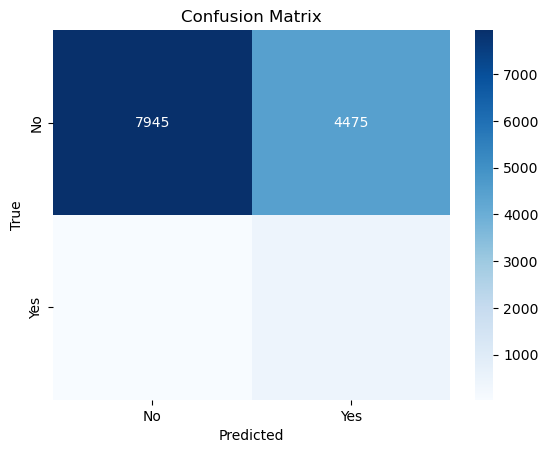

In [32]:
class_names = ['No', 'Yes'] 
# Create a heatmap of the confusion matrix
sns.heatmap(confusion, annot=True, fmt = 'd', cmap= 'Blues', xticklabels=class_names, yticklabels=class_names)
# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [33]:
#Random Search Cross-validation

#Creating dictionary of parameters
rand_parameters={'min_samples_leaf' : range(2,100,5),
                 'max_depth': range(1,20,1),
                 'n_estimators':[40, 50, 100, 150, 200],
                 'min_samples_split': range(1,30,1),
                }

rfc_random = RandomizedSearchCV(rf_model,rand_parameters,cv=5, scoring = 'accuracy')
rfc_random.fit(X_balanced_train, y_balanced_train)

#Finding best parameters  'max_features':[None, 'auto', 'sqrt', 'log2', 0.1, 0.2],
grid_parm_rfc=rfc_random.best_params_
print(grid_parm_rfc)


{'n_estimators': 50, 'min_samples_split': 19, 'min_samples_leaf': 32, 'max_depth': 2}


In [90]:
#create new classifier using the best parameters
rfc_model_2= RandomForestClassifier(**grid_parm_rfc)
rfc_model_2.fit(X_balanced_train, y_balanced_train)


#Model Evaluation on validation set
print("=== Evaluation on Validation data set ===")
y_pred_2 = rfc_model_2.predict(X_balanced_val)
accuracy = accuracy_score(y_balanced_val, y_pred_2)
roc_auc = roc_auc_score(y_balanced_val, rfc_model_2.predict_proba(X_balanced_val)[:,1])
print("Accuracy:", accuracy)
print("ROC AUC:", roc_auc)
print(classification_report(y_balanced_val, y_pred_2))
print('\n')
#Model Evaluation on test set 
print("=== Evaluation on TEST data set ===")
rfc_model_2_predict = rfc_model_2.predict(X_test)
print("Accuracy Score (testset) after hypertuning for Random Forest:{0:6f}".format(rfc_model_2.score(X_test,y_test)))
print('\n')
roc_auc = roc_auc_score(y_test, rfc_model_2.predict_proba(X_test)[:,1])
print("ROC AUC:", roc_auc)
print("Confusion Matrix after hypertuning for Random Forest:")
print(confusion_matrix(y_test,rfc_model_2_predict))
print('\n')
#Classifaction report of TEST data set 
print("=== Classification Report for Test Data ===")
print(classification_report(y_test,rfc_model_2_predict))

#Perform 5-fold cross-validation and use accuracy as the scoring metric
rfc_model_2_cv_score = cross_val_score(rfc_model_2, X_balanced_train, y_balanced_train, cv = 5, scoring = 'accuracy')
print("Cross-Validation Scores:", rfc_model_2_cv_score)
print('\n')

=== Evaluation on Validation data set ===
Accuracy: 0.7
ROC AUC: 0.7949803921568628
              precision    recall  f1-score   support

          No       0.79      0.59      0.68        85
         Yes       0.64      0.83      0.72        75

    accuracy                           0.70       160
   macro avg       0.72      0.71      0.70       160
weighted avg       0.72      0.70      0.70       160



=== Evaluation on TEST data set ===
Accuracy Score (testset) after hypertuning for Random Forest:0.498607


ROC AUC: 0.7463582995427765
Confusion Matrix after hypertuning for Random Forest:
[[5999 6421]
 [  56  442]]


=== Classification Report for Test Data ===
              precision    recall  f1-score   support

          No       0.99      0.48      0.65     12420
         Yes       0.06      0.89      0.12       498

    accuracy                           0.50     12918
   macro avg       0.53      0.69      0.38     12918
weighted avg       0.96      0.50      0.63     1291

In [35]:
#Detecting overfitting using cross validation 

# Calculate and print the mean score across folds
mean_score = rfc_model_2_cv_score.mean()
print("Mean Cross-Validation Score:", mean_score)

# Calculate and print the difference between training and validation scores
train_score = rfc_model_2.fit(X_balanced_train, y_balanced_train).score(X_balanced_train, y_balanced_train)
val_score = rfc_model_2.score(X_test, y_test)
overfitting_indicator = train_score - val_score
print("Training-Validation Score Difference:", overfitting_indicator)

Mean Cross-Validation Score: 0.7210999015748032
Training-Validation Score Difference: 0.239481639917279


In [36]:
#Feature Selection 

feature_importance_scores = rfc_model_2.feature_importances_
sorted_feature_indices = feature_importance_scores.argsort()[::-1]
feature_names = X_balanced.columns

# Select the top N features to display
N = 138

print("Top", N, "Important Features:")
for i in range(N):
    feature_index = sorted_feature_indices[i]
    importance_score = feature_importance_scores[feature_index]
    feature_name = feature_names[feature_index]  # Replace with your feature names
    print(f"{i + 1}. {feature_name}: {importance_score:.4f}")

#indices = np.argsort(important_tree_features)

#fig, ax = plt.subplots(figsize=(15, 18))
#ax.barh(range(len(important_tree_features)), important_tree_features[indices])
#ax.set_yticks(range(len(important_tree_features)))
#_ = ax.set_yticklabels(np.array(X_balanced_train.columns)[indices])

Top 138 Important Features:
1. YEAR: 0.1745
2. VEHICLECATEGORY_Sport: 0.1270
3. BASEPOLICY_All_Perils: 0.0920
4. VEHICLECATEGORY_Sedan: 0.0732
5. POLICYTYPE_Sedan-Liability: 0.0658
6. BASEPOLICY_Liability: 0.0600
7. POLICYTYPE_Sedan-All_Perils: 0.0476
8. FAULT_encoded: 0.0444
9. VEHICLEPRICE_less_than_20000: 0.0313
10. PASTNUMBEROFCLAIMS_none: 0.0291
11. BASEPOLICY_Collision: 0.0212
12. MAKE_Chevrolet: 0.0177
13. AGE: 0.0176
14. REPNUMBER: 0.0151
15. DAYOFWEEK_Thursday: 0.0149
16. VEHICLEPRICE_20000_to_29000: 0.0138
17. PASTNUMBEROFCLAIMS_more_than_4: 0.0133
18. MAKE_Mazda: 0.0108
19. DAYOFWEEK_Monday: 0.0107
20. WEEKOFMONTH: 0.0106
21. AGEOFPOLICYHOLDER_41_to_50: 0.0106
22. DAYOFWEEK_Friday: 0.0106
23. POLICYTYPE_Sedan-Collision: 0.0095
24. ACCIDENTAREA_encoded: 0.0094
25. AGEOFVEHICLE_7_years: 0.0093
26. AGEOFPOLICYHOLDER_36_to_40: 0.0091
27. DAYOFWEEK_Tuesday: 0.0075
28. DAYOFWEEKCLAIMED_Thursday: 0.0062
29. DRIVERRATING: 0.0054
30. MONTH_Sep: 0.0049
31. MONTHCLAIMED_Feb: 0.0043
32.

In [37]:
##==========DECISTION=====TREE========##

In [92]:
from sklearn.tree import DecisionTreeClassifier
#Choose Decision Tree Model 
decision_tree = DecisionTreeClassifier()

#Train the decision tree model
decision_tree.fit(X_balanced_train, y_balanced_train)

#Model Evaluation on validation set
y_pred = decision_tree.predict(X_balanced_val)
accuracy = accuracy_score(y_balanced_val, y_pred)
roc_auc = roc_auc_score(y_balanced_val, decision_tree.predict_proba(X_balanced_val)[:,1])

print("Accuracy:", accuracy)
print("ROC AUC:", roc_auc)
print(classification_report(y_balanced_val, y_pred))

Accuracy: 0.7625
ROC AUC: 0.7615686274509803
              precision    recall  f1-score   support

          No       0.78      0.78      0.78        85
         Yes       0.75      0.75      0.75        75

    accuracy                           0.76       160
   macro avg       0.76      0.76      0.76       160
weighted avg       0.76      0.76      0.76       160



In [77]:
#Model Evaluation on test set 
print("=== Evaluation on TEST data set ===")
test_pred = decision_tree.predict(X_test)
accuracy = accuracy_score(y_test, test_pred)
roc_auc = roc_auc_score(y_test, decision_tree.predict_proba(X_test)[:,1])

print("Accuracy:", accuracy)
print("ROC AUC:", roc_auc)
print(classification_report(y_test, test_pred))

=== Evaluation on TEST data set ===
Accuracy: 0.6847809258399133
ROC AUC: 0.8033030673418311
              precision    recall  f1-score   support

          No       1.00      0.67      0.80     12420
         Yes       0.10      0.93      0.19       498

    accuracy                           0.68     12918
   macro avg       0.55      0.80      0.50     12918
weighted avg       0.96      0.68      0.78     12918



In [83]:
#Performing Hyperpaameter tuning using gridsearchCV
parameter_grid = {
    'min_samples_split': [2, 5,10,15,20,25,30],
    'min_samples_leaf': [2,4,6,8,10,12,14,16,18,20, 22, 24, 26, 28, 30, 32, 50],
    'max_depth': [None, 1, 2, 5, 10, 15, 20, 25]
}

#Performing grid search to find the best parameters for the model
grid_search = GridSearchCV(decision_tree, parameter_grid, cv = 5, scoring = 'accuracy')
grid_search.fit(X_balanced_train, y_balanced_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(min_samples_leaf=10,
                                              min_samples_split=10,
                                              random_state=42),
             param_grid={'max_depth': [None, 1, 2, 5, 10, 15, 20, 25],
                         'min_samples_leaf': [2, 4, 6, 8, 10, 12, 14, 16, 18,
                                              20, 22, 24, 26, 28, 30, 32, 50],
                         'min_samples_split': [2, 5, 10, 15, 20, 25, 30]},
             scoring='accuracy')

In [88]:
#Finding best parameters
best_parameter = grid_search.best_params_

# Print the best parameters and scores
print("Best Parameters:", best_parameter)
print("Best Score:", grid_search.best_score_) #Measure of the model's predictive accuracy.

Best Parameters: {'max_depth': None, 'min_samples_leaf': 10, 'min_samples_split': 2}
Best Score: 0.782197342519685


In [85]:
#Train decision tree model with best parameters 
decision_tree = DecisionTreeClassifier(random_state = 42, **best_parameter)
decision_tree.fit(X_balanced_train, y_balanced_train)

DecisionTreeClassifier(min_samples_leaf=10, random_state=42)

In [86]:
#Model Evaluation on validation set
y_pred = decision_tree.predict(X_balanced_val)
accuracy = accuracy_score(y_balanced_val, y_pred)
roc_auc = roc_auc_score(y_balanced_val, decision_tree.predict_proba(X_balanced_val)[:,1])

print("Accuracy:", accuracy)
print("ROC AUC:", roc_auc)
print(classification_report(y_balanced_val, y_pred))

Accuracy: 0.7375
ROC AUC: 0.8
              precision    recall  f1-score   support

          No       0.74      0.79      0.76        85
         Yes       0.74      0.68      0.71        75

    accuracy                           0.74       160
   macro avg       0.74      0.73      0.73       160
weighted avg       0.74      0.74      0.74       160



In [87]:
#Model Evaluation on test set 
print("=== Evaluation on TEST data set ===")
test_pred = decision_tree.predict(X_test)
accuracy = accuracy_score(y_test, test_pred)
roc_auc = roc_auc_score(y_test, decision_tree.predict_proba(X_test)[:,1])

print("Accuracy:", accuracy)
print("ROC AUC:", roc_auc)
print(classification_report(y_test, test_pred))

=== Evaluation on TEST data set ===
Accuracy: 0.6962378077101719
ROC AUC: 0.7827832263029574
              precision    recall  f1-score   support

          No       0.99      0.69      0.81     12420
         Yes       0.09      0.80      0.17       498

    accuracy                           0.70     12918
   macro avg       0.54      0.75      0.49     12918
weighted avg       0.95      0.70      0.79     12918

